In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import scikitplot as skplt

import sklearn.preprocessing as preprocessing
import seaborn as sns

In [5]:
titanic_data = pd.read_csv('input/titanic/train.csv')
test_data = pd.read_csv('input/titanic/test.csv')

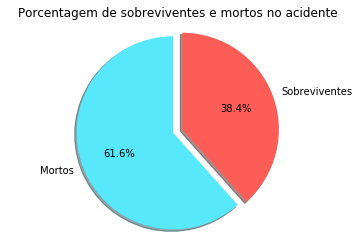

In [6]:
# Taxa de sobreviventes e mortos no desastre
labels = ['Mortos', 'Sobreviventes']
val_counts = titanic_data.Survived.value_counts()

sizes = [val_counts[0], val_counts[1]]
colors = ['#57e8fc', '#fc5e57']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, shadow=True, startangle=90, explode=(0.1,0), autopct='%1.1f%%', colors=colors)
ax.axis('equal')
plt.title('Porcentagem de sobreviventes e mortos no acidente')
plt.show()

In [7]:
# Tratamentos dados ao dataset:
# 1 - Retirada das colunas PassengerId, Cabin, Ticket e Fare
# 2 - Transformar features Sex e Embarked em features numéricas, mantendo a sua categorização
# 3 - Criação de uma feature chamada isAlone, aonde a mesma é uma feature extraída das colunas SibSp and Parch
# 4 - Completar os valores faltantes em Age e Fare com a média

In [8]:
full_data = [titanic_data, test_data]

for dataset in full_data:
    # 1
    dataset.drop(['Ticket', 'Cabin', 'PassengerId', 'Name'], axis=1, inplace = True)
    # 2
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)
    dataset['Embarked'].fillna(titanic_data['Embarked'].dropna().mode()[0], inplace = True)
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    # 3
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
    dataset.drop(['Parch', 'SibSp', 'FamilySize'], axis=1, inplace=True)
    # 4
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

In [9]:
y_values = titanic_data['Survived'].values
titanic_data.drop(['Survived'], axis=1, inplace=True)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(titanic_data, y_values, test_size=0.2, stratify=y_values, random_state=32)

In [25]:
# Considerando os sets de treino e teste criados anteriormente (x_train, x_test, y_train, y_test),
# escolha e treine 3 dos modelos apresentados na aula, cujos nomes estão na lista names.
# 1 - Regressão Logística
# 2 - SVM
# 3 - KNN
# 4 - Árvores de Decisão
# 5 - Random Forest Rede
# 6 - Neural Multi-Camada (MLP)
# Lembrando que é necessário que algums parâmetros sejam tratados na hora da escolha do modelo, então
# não se esqueçam de checar a documentação do scikit-learn.


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

models = [LogisticRegression(), SVC(probability=True), KNeighborsClassifier(n_neighbors=5),
          DecisionTreeClassifier(), RandomForestClassifier(), ]
names = ['Regressão Logística', 'SVM', 'KNN', 'Árvores de Decisão', 'Random Forest', 'Rede neural']

In [26]:
def executa_modelo(models, names):
    for modelo, name in zip(models, names):
        print("-----------", name, "----------- \n")
        instancia_modelo = modelo
        instancia_modelo.fit(x_train, y_train)
        
        print('\nScore Train:', instancia_modelo.score(x_train, y_train))
        print('\nScore Test:', instancia_modelo.score(x_test, y_test))
        print('\nMatriz de Confusão:\n', confusion_matrix(y_test, instancia_modelo.predict(x_test)))
        print('\nMétricas de Classificação:\n', classification_report(y_test, instancia_modelo.predict(x_test))) 

executa_modelo(models, names)

----------- Regressão Logística ----------- 


Score Train: 0.8061797752808989

Score Test: 0.7541899441340782

Matriz de Confusão:
 [[94 16]
 [28 41]]

Métricas de Classificação:
              precision    recall  f1-score   support

          0       0.77      0.85      0.81       110
          1       0.72      0.59      0.65        69

avg / total       0.75      0.75      0.75       179

----------- SVM ----------- 


Score Train: 0.9087078651685393

Score Test: 0.7094972067039106

Matriz de Confusão:
 [[89 21]
 [31 38]]

Métricas de Classificação:
              precision    recall  f1-score   support

          0       0.74      0.81      0.77       110
          1       0.64      0.55      0.59        69

avg / total       0.70      0.71      0.70       179

----------- KNN ----------- 


Score Train: 0.8019662921348315

Score Test: 0.7206703910614525

Matriz de Confusão:
 [[93 17]
 [33 36]]

Métricas de Classificação:
              precision    recall  f1-score   support

     

In [27]:
# Considerando os modelos treinados no exercício anterior, re-treine os modelos utilizando o método de 
# validação cruzada (cross_validation no pacote scikit-learn), e compare a acurácia de ambas as situações
# (sem a utilização de validação cruzada e com a utilização de validação cruzada).
#
# Além disso, deve ser apresentada a métrica de log-loss do modelo, a sua respectiva matriz de confusão
# (confusion_matrix no pacote do scikit-learn) e a apresentação da curva ROC do modelo (dica: utilize o pacote
# scikitplot)
from sklearn.model_selection import cross_validate
from sklearn.metrics import log_loss

----------- Regressão Logística ----------- 


Score:
 {'fit_time': array([0.00543785, 0.00611782, 0.00529385, 0.00483871, 0.00465012]), 'score_time': array([0.00447226, 0.00508332, 0.0055778 , 0.00402498, 0.00402308]), 'test_neg_log_loss': array([-0.47555844, -0.47117016, -0.45220123, -0.46647869, -0.43263626]), 'train_neg_log_loss': array([-0.44551883, -0.44433844, -0.45039602, -0.44751861, -0.45513108]), 'test_accuracy': array([0.77653631, 0.78212291, 0.78089888, 0.7752809 , 0.79661017]), 'train_accuracy': array([0.79213483, 0.78792135, 0.79242637, 0.80504909, 0.79131653]), 'test_precision': array([0.71641791, 0.71428571, 0.71014493, 0.75      , 0.75      ]), 'train_precision': array([0.74900398, 0.72262774, 0.74609375, 0.75862069, 0.74319066]), 'test_recall': array([0.69565217, 0.72463768, 0.72058824, 0.61764706, 0.70588235]), 'train_recall': array([0.68864469, 0.72527473, 0.69708029, 0.72262774, 0.69708029])}

Matriz de Confusão:
 [[94 16]
 [28 41]]
----------- SVM ----------- 




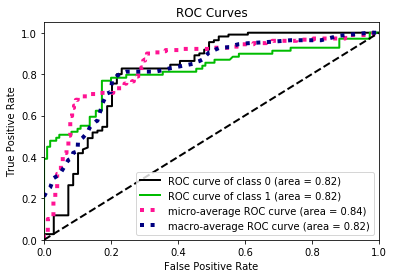

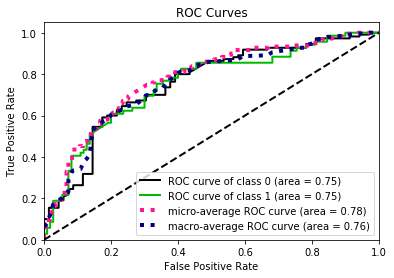

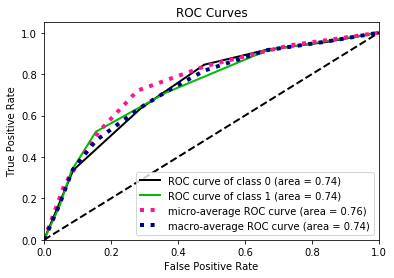

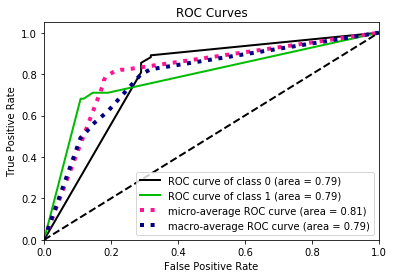

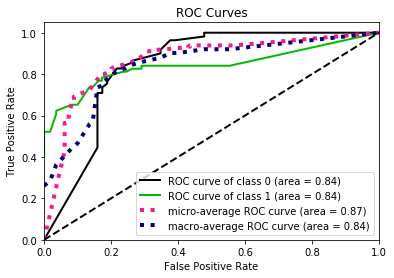

In [28]:
def executa_relatorio_modelo(models, names):
    for modelo, name in zip(models, names):
        print("-----------", name, "----------- \n")
        instancia_modelo = modelo
        instancia_modelo.fit(x_train, y_train)
        
        score = cross_validate(instancia_modelo, titanic_data, y_values, cv=5,
                               scoring=['neg_log_loss', 'accuracy', 'precision', 'recall'])
        
        matriz_confusao = confusion_matrix(y_test, instancia_modelo.predict(x_test))
        
        print('\nScore:\n', score)
        print('\nMatriz de Confusão:\n', matriz_confusao)
        
        # Plot da Curva ROC
        skplt.metrics.plot_roc(y_test, instancia_modelo.predict_proba(x_test))
        
executa_relatorio_modelo(models, names)